<a href="https://colab.research.google.com/github/manasamorthad/Machine-Learning/blob/main/ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv("/content/diabetes_DT (1).csv")

In [4]:
[col for col in df.columns if df[col].isnull().sum()>0]

[]

In [5]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
X=df.drop("Outcome",axis=1)
y=df["Outcome"]

In [7]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [9]:
clf=DecisionTreeClassifier(random_state=42)
clf=clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [10]:
print("accuracy is",metrics.accuracy_score(y_test,y_pred))
print("precison is",metrics.precision_score(y_test,y_pred))
print("recall is",metrics.recall_score(y_test,y_pred))
print("f1-score is",metrics.f1_score(y_test,y_pred))

accuracy is 0.7012987012987013
precison is 0.5555555555555556
recall is 0.6875
f1-score is 0.6145251396648045


In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
rf=RandomForestClassifier(n_estimators=50,random_state=0)
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)

In [13]:
print("accuracy is",metrics.accuracy_score(y_test,y_pred_rf))
print("precison is",metrics.precision_score(y_test,y_pred_rf))
print("recall is",metrics.recall_score(y_test,y_pred_rf))
print("f1-score is",metrics.f1_score(y_test,y_pred_rf))

accuracy is 0.7316017316017316
precison is 0.618421052631579
recall is 0.5875
f1-score is 0.6025641025641025


| Metric        | Decision Tree | Random Forest |
| ------------- | ------------- | ------------- |
| **Accuracy**  | 0.7013        | 0.7316        |
| **Precision** | 0.5556        | 0.6184        |
| **Recall**    | 0.6875        | 0.5875        |
| **F1-score**  | 0.6145        | 0.6026        |
        |


In [14]:
rf=RandomForestClassifier(  n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    criterion='entropy',
    random_state=0)
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)

In [15]:
print("accuracy is",metrics.accuracy_score(y_test,y_pred_rf))
print("precison is",metrics.precision_score(y_test,y_pred_rf))
print("recall is",metrics.recall_score(y_test,y_pred_rf))
print("f1-score is",metrics.f1_score(y_test,y_pred_rf))

accuracy is 0.7619047619047619
precison is 0.654320987654321
recall is 0.6625
f1-score is 0.6583850931677019


| **Metric**    | **DT**     | **RF (50)** | **RF (Tuned)** |
| ------------- | ---------- | ----------- | -------------- |
| **Accuracy**  | 0.7013     | 0.7316      | **0.7619**     |
| **Precision** | 0.5556     | 0.6184      | **0.6543**     |
| **Recall**    | **0.6875** | 0.5875      | 0.6625         |
| **F1-Score**  | 0.6145     | 0.6026      | **0.6584**     |


In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
from sklearn.ensemble import VotingClassifier

In [18]:
estimators = [
    ('lr', LogisticRegression(max_iter=200, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
]

# Create Voting Classifier - Hard Voting
hard_voting = VotingClassifier(estimators=estimators, voting='hard')

# Train the ensemble
hard_voting.fit(x_train, y_train)

# Make predictions
y_pred = hard_voting.predict(x_test)

# Evaluate Accuracy
score = metrics.accuracy_score(y_test, y_pred)
print("Hard Voting Accuracy: {:.3f}".format(score))


Hard Voting Accuracy: 0.749


In [19]:
soft_voting = VotingClassifier(estimators=estimators, voting='soft')
soft_voting.fit(x_train, y_train)
y_pred_soft = soft_voting.predict(x_test)
print("Soft Voting Accuracy: {:.3f}".format(metrics.accuracy_score(y_test, y_pred_soft)))


Soft Voting Accuracy: 0.736


In [20]:
lr = LogisticRegression(max_iter=200, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [21]:
lr.fit(x_train, y_train)
dt.fit(x_train, y_train)
rf.fit(x_train, y_train)

w1 = metrics.accuracy_score(y_test, lr.predict(x_test))
w2 = metrics.accuracy_score(y_test, dt.predict(x_test))
w3 = metrics.accuracy_score(y_test, rf.predict(x_test))

weighted_voting = VotingClassifier(
    estimators=estimators,
    voting='soft',           # soft voting with probabilities
    weights=[w1, w2, w3]     # weights based on model performance
)
weighted_voting.fit(x_train, y_train)
y_pred_weighted = weighted_voting.predict(x_test)
print("Weighted Voting Accuracy: {:.3f}".format(metrics.accuracy_score(y_test, y_pred_weighted)))

Weighted Voting Accuracy: 0.736


In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
estimators = [
    ('lr', LogisticRegression(max_iter=200, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5))
]

# --- Hard Voting ---
hard_voting = VotingClassifier(estimators=estimators, voting='hard')
hard_voting.fit(x_train, y_train)
y_pred_hard = hard_voting.predict(x_test)

# --- Soft Voting ---
soft_voting = VotingClassifier(estimators=estimators, voting='soft')
soft_voting.fit(x_train, y_train)
y_pred_soft = soft_voting.predict(x_test)

# --- Evaluation ---
print("Hard Voting Metrics:")
print("Accuracy:", round(metrics.accuracy_score(y_test, y_pred_hard),3))
print("Precision:", round(metrics.precision_score(y_test, y_pred_hard, average='macro'),3))
print("Recall:", round(metrics.recall_score(y_test, y_pred_hard, average='macro'),3))
print("F1-Score:", round(metrics.f1_score(y_test, y_pred_hard, average='macro'),3))
print()

print("Soft Voting Metrics:")
print("Accuracy:", round(metrics.accuracy_score(y_test, y_pred_soft),3))
print("Precision:", round(metrics.precision_score(y_test, y_pred_soft, average='macro'),3))
print("Recall:", round(metrics.recall_score(y_test, y_pred_soft, average='macro'),3))
print("F1-Score:", round(metrics.f1_score(y_test, y_pred_soft, average='macro'),3))

Hard Voting Metrics:
Accuracy: 0.719
Precision: 0.692
Recall: 0.7
F1-Score: 0.695

Soft Voting Metrics:
Accuracy: 0.71
Precision: 0.686
Recall: 0.696
F1-Score: 0.689


4. Exploring Bagging Technique (Random Forest)
Task:
Write a program to explore the Bagging technique using the RandomForestClassifier on a
suitable dataset.
Experiment with parameters such as number of estimators, maximum depth, and random
state.
Write detailed observations and justify the changes in model performance.

In [25]:
n_estimators_list = [5, 10, 50, 100]
max_depth_list = [2, 4, 6, None]
accuracy_results = []

for n in n_estimators_list:
    for d in max_depth_list:
        model = RandomForestClassifier(
            n_estimators=n, max_depth=d, random_state=42
        )
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        acc = metrics.accuracy_score(y_test, y_pred)
        accuracy_results.append((n, d, acc))

# Step 5: Display results
print("Results:")
for n, d, acc in accuracy_results:
    print(f"n_estimators={n}, max_depth={d}, Accuracy={acc:.3f}")

Results:
n_estimators=5, max_depth=2, Accuracy=0.723
n_estimators=5, max_depth=4, Accuracy=0.732
n_estimators=5, max_depth=6, Accuracy=0.723
n_estimators=5, max_depth=None, Accuracy=0.719
n_estimators=10, max_depth=2, Accuracy=0.736
n_estimators=10, max_depth=4, Accuracy=0.745
n_estimators=10, max_depth=6, Accuracy=0.758
n_estimators=10, max_depth=None, Accuracy=0.740
n_estimators=50, max_depth=2, Accuracy=0.749
n_estimators=50, max_depth=4, Accuracy=0.766
n_estimators=50, max_depth=6, Accuracy=0.749
n_estimators=50, max_depth=None, Accuracy=0.740
n_estimators=100, max_depth=2, Accuracy=0.745
n_estimators=100, max_depth=4, Accuracy=0.753
n_estimators=100, max_depth=6, Accuracy=0.749
n_estimators=100, max_depth=None, Accuracy=0.753


In [27]:
import matplotlib.pyplot as plt


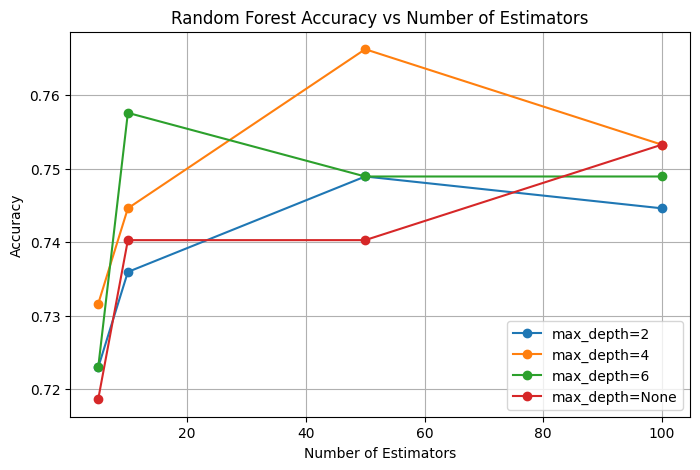

In [28]:
plt.figure(figsize=(8, 5))
for d in max_depth_list:
    plt.plot(
        [n for n, md, _ in accuracy_results if md == d],
        [acc for n, md, acc in accuracy_results if md == d],
        marker="o",
        label=f"max_depth={d}",
    )
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.title("Random Forest Accuracy vs Number of Estimators")
plt.legend()
plt.grid(True)

In [29]:
final_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
final_model.fit(x_train, y_train)
y_pred = final_model.predict(x_test)

print("\nFinal Model Performance (n_estimators=100, max_depth=None):")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n",metrics. confusion_matrix(y_test, y_pred))


Final Model Performance (n_estimators=100, max_depth=None):
Accuracy: 0.7532467532467533
Confusion Matrix:
 [[121  30]
 [ 27  53]]


5. Using RandomForestRegressor and OOB Score
Task:
Write a program using the RandomForestRegressor model to make predictions on a
suitable regression dataset.
Enable and observe the oob_score (Out-of-Bag score) parameter.
Interpret the results and explain its significance.

In [33]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import pandas as pd

In [34]:
# Step 2: Load a regression dataset
data = load_diabetes()
x = data.data
y = data.target
# Step 3: Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
# Step 4: Initialize the RandomForestRegressor with OOB enabled
model = RandomForestRegressor(
    n_estimators=100,
    oob_score=True,          # Enables Out-of-Bag estimation
    random_state=42,
    bootstrap=True           # Must be True for OOB score
)

# Step 5: Train the model
model.fit(x_train, y_train)

# Step 6: Make predictions
y_pred = model.predict(x_test)


In [37]:
# Step 7: Evaluate performance
print("\n🔹 Model Evaluation Results:")
print("OOB Score (from training):", model.oob_score_)
print("R² Score (on test data):", metrics.r2_score(y_test, y_pred))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


🔹 Model Evaluation Results:
OOB Score (from training): 0.42941696635868554
R² Score (on test data): 0.47027066465218703
Mean Absolute Error: 42.75075187969925
Root Mean Squared Error: 53.4756204518168
